In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [4]:
models = ['ref','theta_1.03','theta_1.02']

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'newtonian',
                  'output':'tCl, lCl',
                  'omega_cdm':0.12038,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'tight_coupling_approximation':0,
                  #'tight_coupling_trigger_tau_c_over_tau_h':0.012,
                  #'tight_coupling_trigger_tau_c_over_tau_k':0.008,
                  #'recfast_H_frac':3e-4,
                  #'reio_parametrization':'reio_none',
                  '100*theta_s':1.042143,
                  #'100*theta_s':1.02,
                  #'background_verbose':5,
                  #'input_verbose':5,
                  #'perturbations_verbose':5,
                  #'h':0.67556,
                  'lensing':'yes'
                 })
    if M == 'theta_1.03':
        cosmo[M].set({'100*theta_s':1.03})
    if M == 'theta_1.02':
        cosmo[M].set({'100*theta_s':1.02})
    cosmo[M].compute()

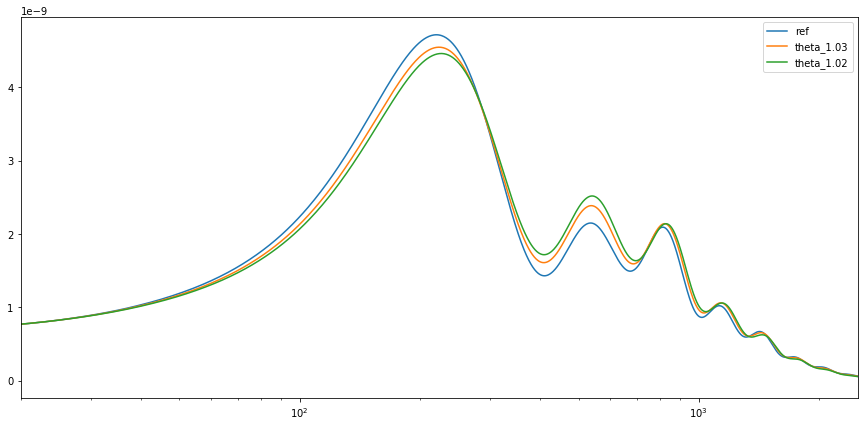

In [5]:
fig = plt.figure(1, figsize = (15,7))
ax = fig.add_subplot(111)
for M in models:
    cl = cosmo[M].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.semilogx(l,(l*(l+1))*TT, label=M)
ax.set_xlim(20,2.5e3)
ax.legend()

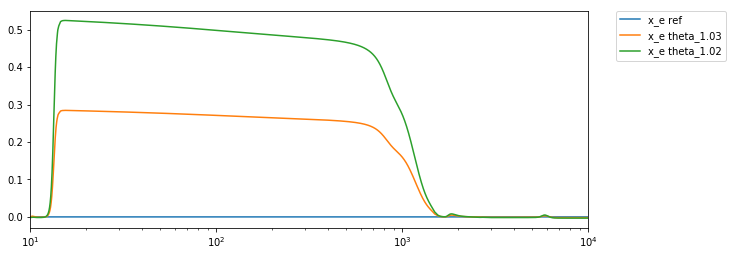

In [6]:
plt.figure(figsize = (10,4))
Th = cosmo['ref'].get_thermodynamics()
x_eref = interp1d(Th['z'],Th['x_e'])

for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    plt.semilogx(Th['z'],(Th['x_e']-x_eref(Th['z']))/x_eref(Th['z']),label='x_e '+M)
plt.xlim(10,1e4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

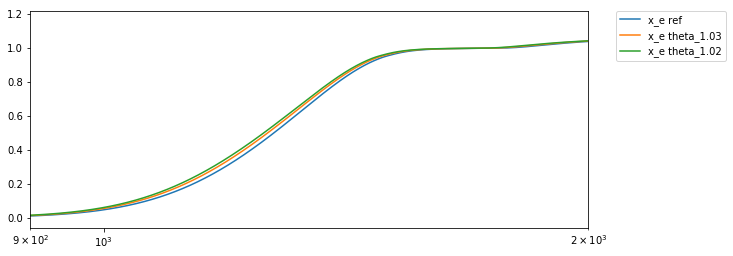

In [8]:
plt.figure(figsize = (10,4))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    plt.semilogx(Th['z'],Th['x_e'],label='x_e '+M)
plt.xlim(9e2,2e3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)